In [1]:
import sys
sys.path.append("/u/lukas.rilling/dev/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
%matplotlib widget

from returnn_training_progress import get_epoch_data
from returnn_training_plot_nb import plot_df
%load_ext autoreload
%autoreload 2

In [2]:
lr_files = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glow_TTS_ASR*/training"
# lr_files = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_100ep_not_silence_preprocessed_speaker_drop_*/training"

lr_files = glob.glob(lr_files)

common_prefix = os.path.commonpath(lr_files)
common_sufix = os.path.commonpath([l[::-1] for l in lr_files])[::-1]

names = []
for f in lr_files:
    names.append(f.removeprefix(common_prefix).removesuffix(common_sufix))

files = dict(zip(lr_files, names))
files

{'/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glow_TTS_ASR/training': '/glow_TTS_ASR/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glow_TTS_ASR_v2/training': '/glow_TTS_ASR_v2/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glow_TTS_ASR_unjoint_control/training': '/glow_TTS_ASR_unjoint_control/'}

In [3]:
lr_files.append(
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/no_glow/training"
)
files[lr_files[-1]] = "Baseline Conformer Only"

lr_files.append(
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed/training"
)
files[lr_files[-1]] = "Baseline"

lr_files.append(
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS/enc192/100ep/not_silence_preprocessed/training"
)
files[lr_files[-1]] = "Baseline GlowTTS"
lr_files

['/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glow_TTS_ASR/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glow_TTS_ASR_v2/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/raw_audio/glow_TTS_ASR_unjoint_control/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/no_glow/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS/enc192/100ep/not_silence_preprocessed/training']

In [4]:
# plot_lr = True
plot_lr = False

Large Font: True
Setup Interactive Legend
Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))
self.on_pick: <bound method InteractiveLegend.on_pick of <returnn_training_plot_nb.InteractiveLegend object at 0x7fad79b2fc40>>
update


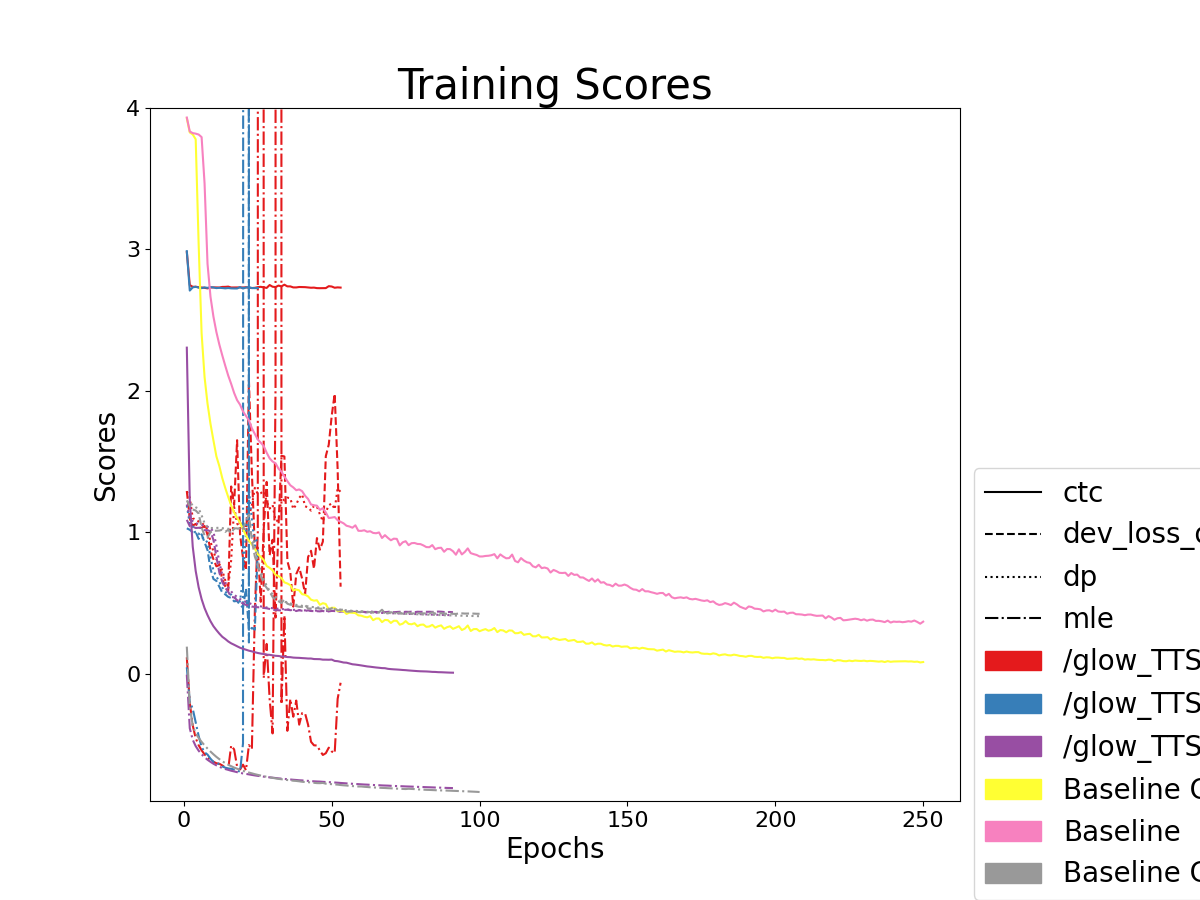

Click


In [5]:
error_data = {}
labels = list(files.values())
for i, lr_file in enumerate(lr_files):
    data = get_epoch_data(lr_file, epoch=None)
    if data is None:
        continue
    for ep, ep_data in data.items():
        ep_data_error = ep_data.pop("error", {})
        error_data[(labels[i], ep)] = ep_data
        error_data[(labels[i], ep)].update(ep_data_error)
df = pd.DataFrame.from_dict(error_data, orient="index")
# plot_df(df.drop(["mle", "dp"], axis=1), plot_lr, large_font=True, shrink_axes=0.8)
plot_df(
    df,
    plot_lr=False,
    large_font=True,
    shrink_axes=0.8,
    ylim_max=4,
    ylim_min=-0.9,
    keys_exclude="dev_loss_(mle|ctc)",
    color_map="Set1"
)